# INFORMACIÓN DEL PROYECTO DE MACHINE LEARNING

## TÍTULO

##### **PREDICCIÓN DE LA CALIDAD DEL VINO BLANCO EN FUNCIÓN DE DIVERSOS FACTORES DE COMPOSICIÓN**

## DATASET Y OBTENCIÓN DE LOS DATOS

He encontrado en la plataforma de [Kaggle](https://www.kaggle.com/), un dataset muy completo en el que puedo aplicar los conocimientos adquiridos en este bloque de contenido dedicado al *Machine Learning*. La base de datos es la siguiente:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
vino = pd.read_csv('../data/raw/winequality-white.csv', delimiter= ';')
vino

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
vino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
vino.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Al desplegar la base de datos, me doy cuenta de que la columna *target* (que es la denominada *quality*), lleva una clasificación de números enteros. Así que voy a sacar los valores únicos para ver de qué se componen estos números.

In [45]:
vino['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

Parece ser que se trata una clasificación que va del 3 al 9. El resto de las columnas está compuesto de datos con valores de tipo decimal.

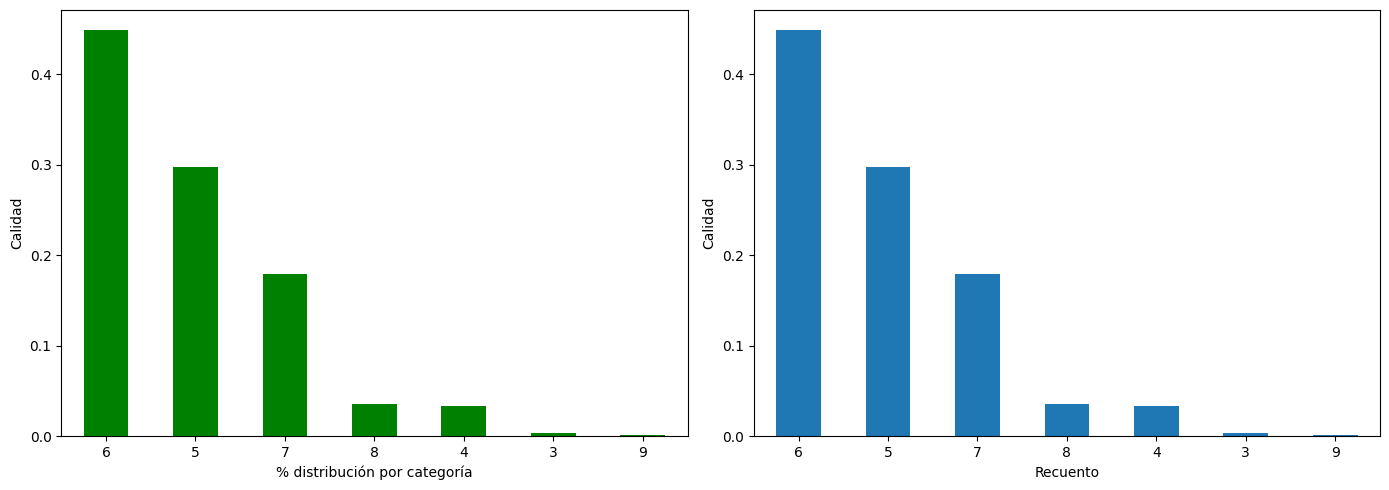

In [46]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
vino['quality'].value_counts(normalize=True).plot.bar(rot=0, color='green')
plt.ylabel('Calidad')
plt.xlabel('% distribución por categoría')
plt.subplot(1,2,2)
vino['quality'].value_counts(normalize=True).plot.bar(rot=0)
plt.ylabel('Calidad')
plt.xlabel('Recuento')
plt.tight_layout()
plt.show()

Se ve que los vinos de calidad 6 son los que más salen representados. A la izquierda, se ve que representan más del 40 % del dataset. A la derecha, son más de 2000 vinos.

También se aprecia que el dataset no está bien distribuido, lo que puede influir negativamente en el desempeño del modelo de ML.

Además, como los datos son fundamentalmente numéricos y, por lo tanto, no los podemos clasificar en categorías, vamos a transformarlos en categorías a partir de la columna de alcohol a ver si nos ayuda con nuestro análisis.

In [47]:
def alcohol_level(alcohol):
    if alcohol <= 9.5:
        return "Bajo"
    elif alcohol <= 11:
        return "Moderado"
    elif alcohol <= 12.5:
        return "Elevado"
    else:
        return "Muy elevado"

vino['alcohol_category'] = vino['alcohol'].apply(alcohol_level)
vino.sample(frac=1).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_category
1352,5.7,0.210,0.24,2.3,0.047,60.0,189.0,0.9950,3.65,0.72,10.1,6,Moderado
1073,7.7,0.340,0.30,8.0,0.048,25.0,192.0,0.9951,2.97,0.47,10.9,5,Moderado
182,6.8,0.280,0.40,22.0,0.048,48.0,167.0,1.0010,2.93,0.50,8.7,5,Bajo
477,7.0,0.220,0.28,1.5,0.037,29.0,115.0,0.9927,3.11,0.55,10.5,6,Moderado
926,5.4,0.595,0.10,2.8,0.042,26.0,80.0,0.9932,3.36,0.38,9.3,5,Bajo


<Figure size 1500x3000 with 0 Axes>

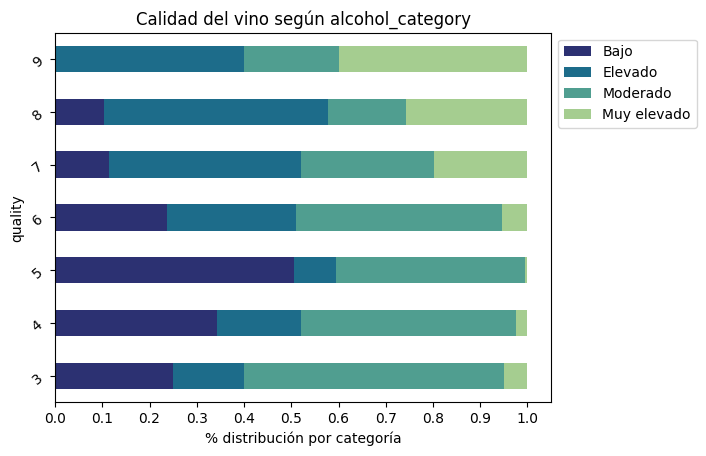

In [48]:
plt.figure(figsize=(15,30))

cross = pd.crosstab(index=vino['quality'],columns=vino['alcohol_category'],normalize='index')
cross.plot.barh(stacked=True,rot=40,cmap='crest_r').legend(bbox_to_anchor=(1.0, 1.0))
plt.xlabel('% distribución por categoría')
plt.xticks(np.arange(0,1.1,0.1))
plt.title("Calidad del vino según {}".format('alcohol_category'))
plt.show()

Parece que no hay ningún vino con poco alcohol y que tenga calidad. En general se ve que a mayor tasa de alcohol, mayor será la calidad del vino.

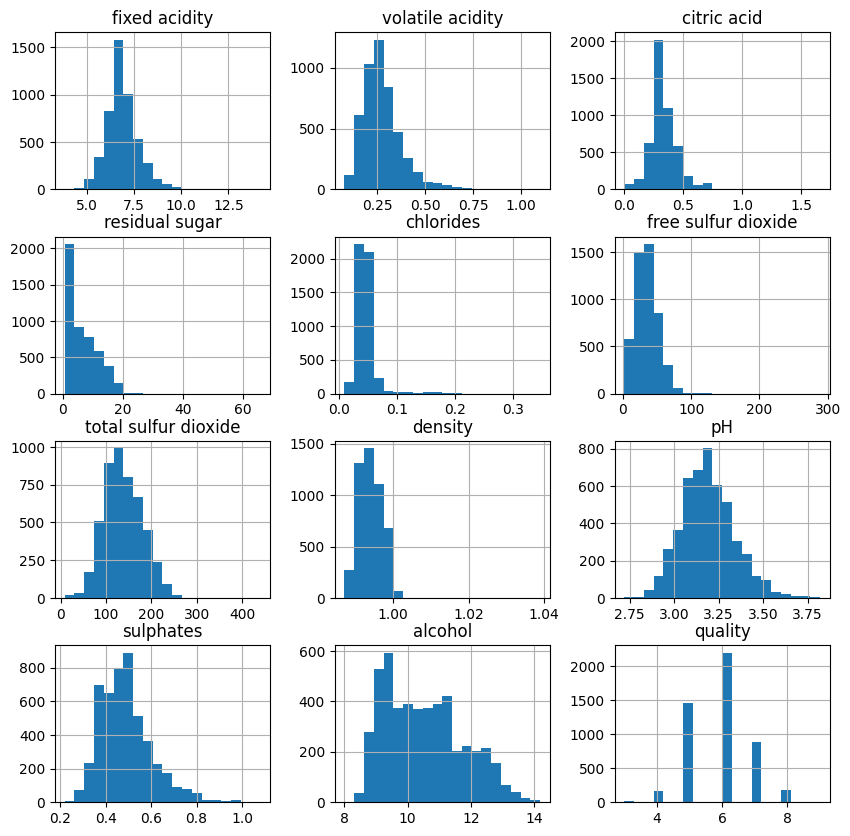

In [49]:
vino.hist(bins=20, figsize=(10, 10))
plt.show()

<Figure size 1800x4000 with 0 Axes>

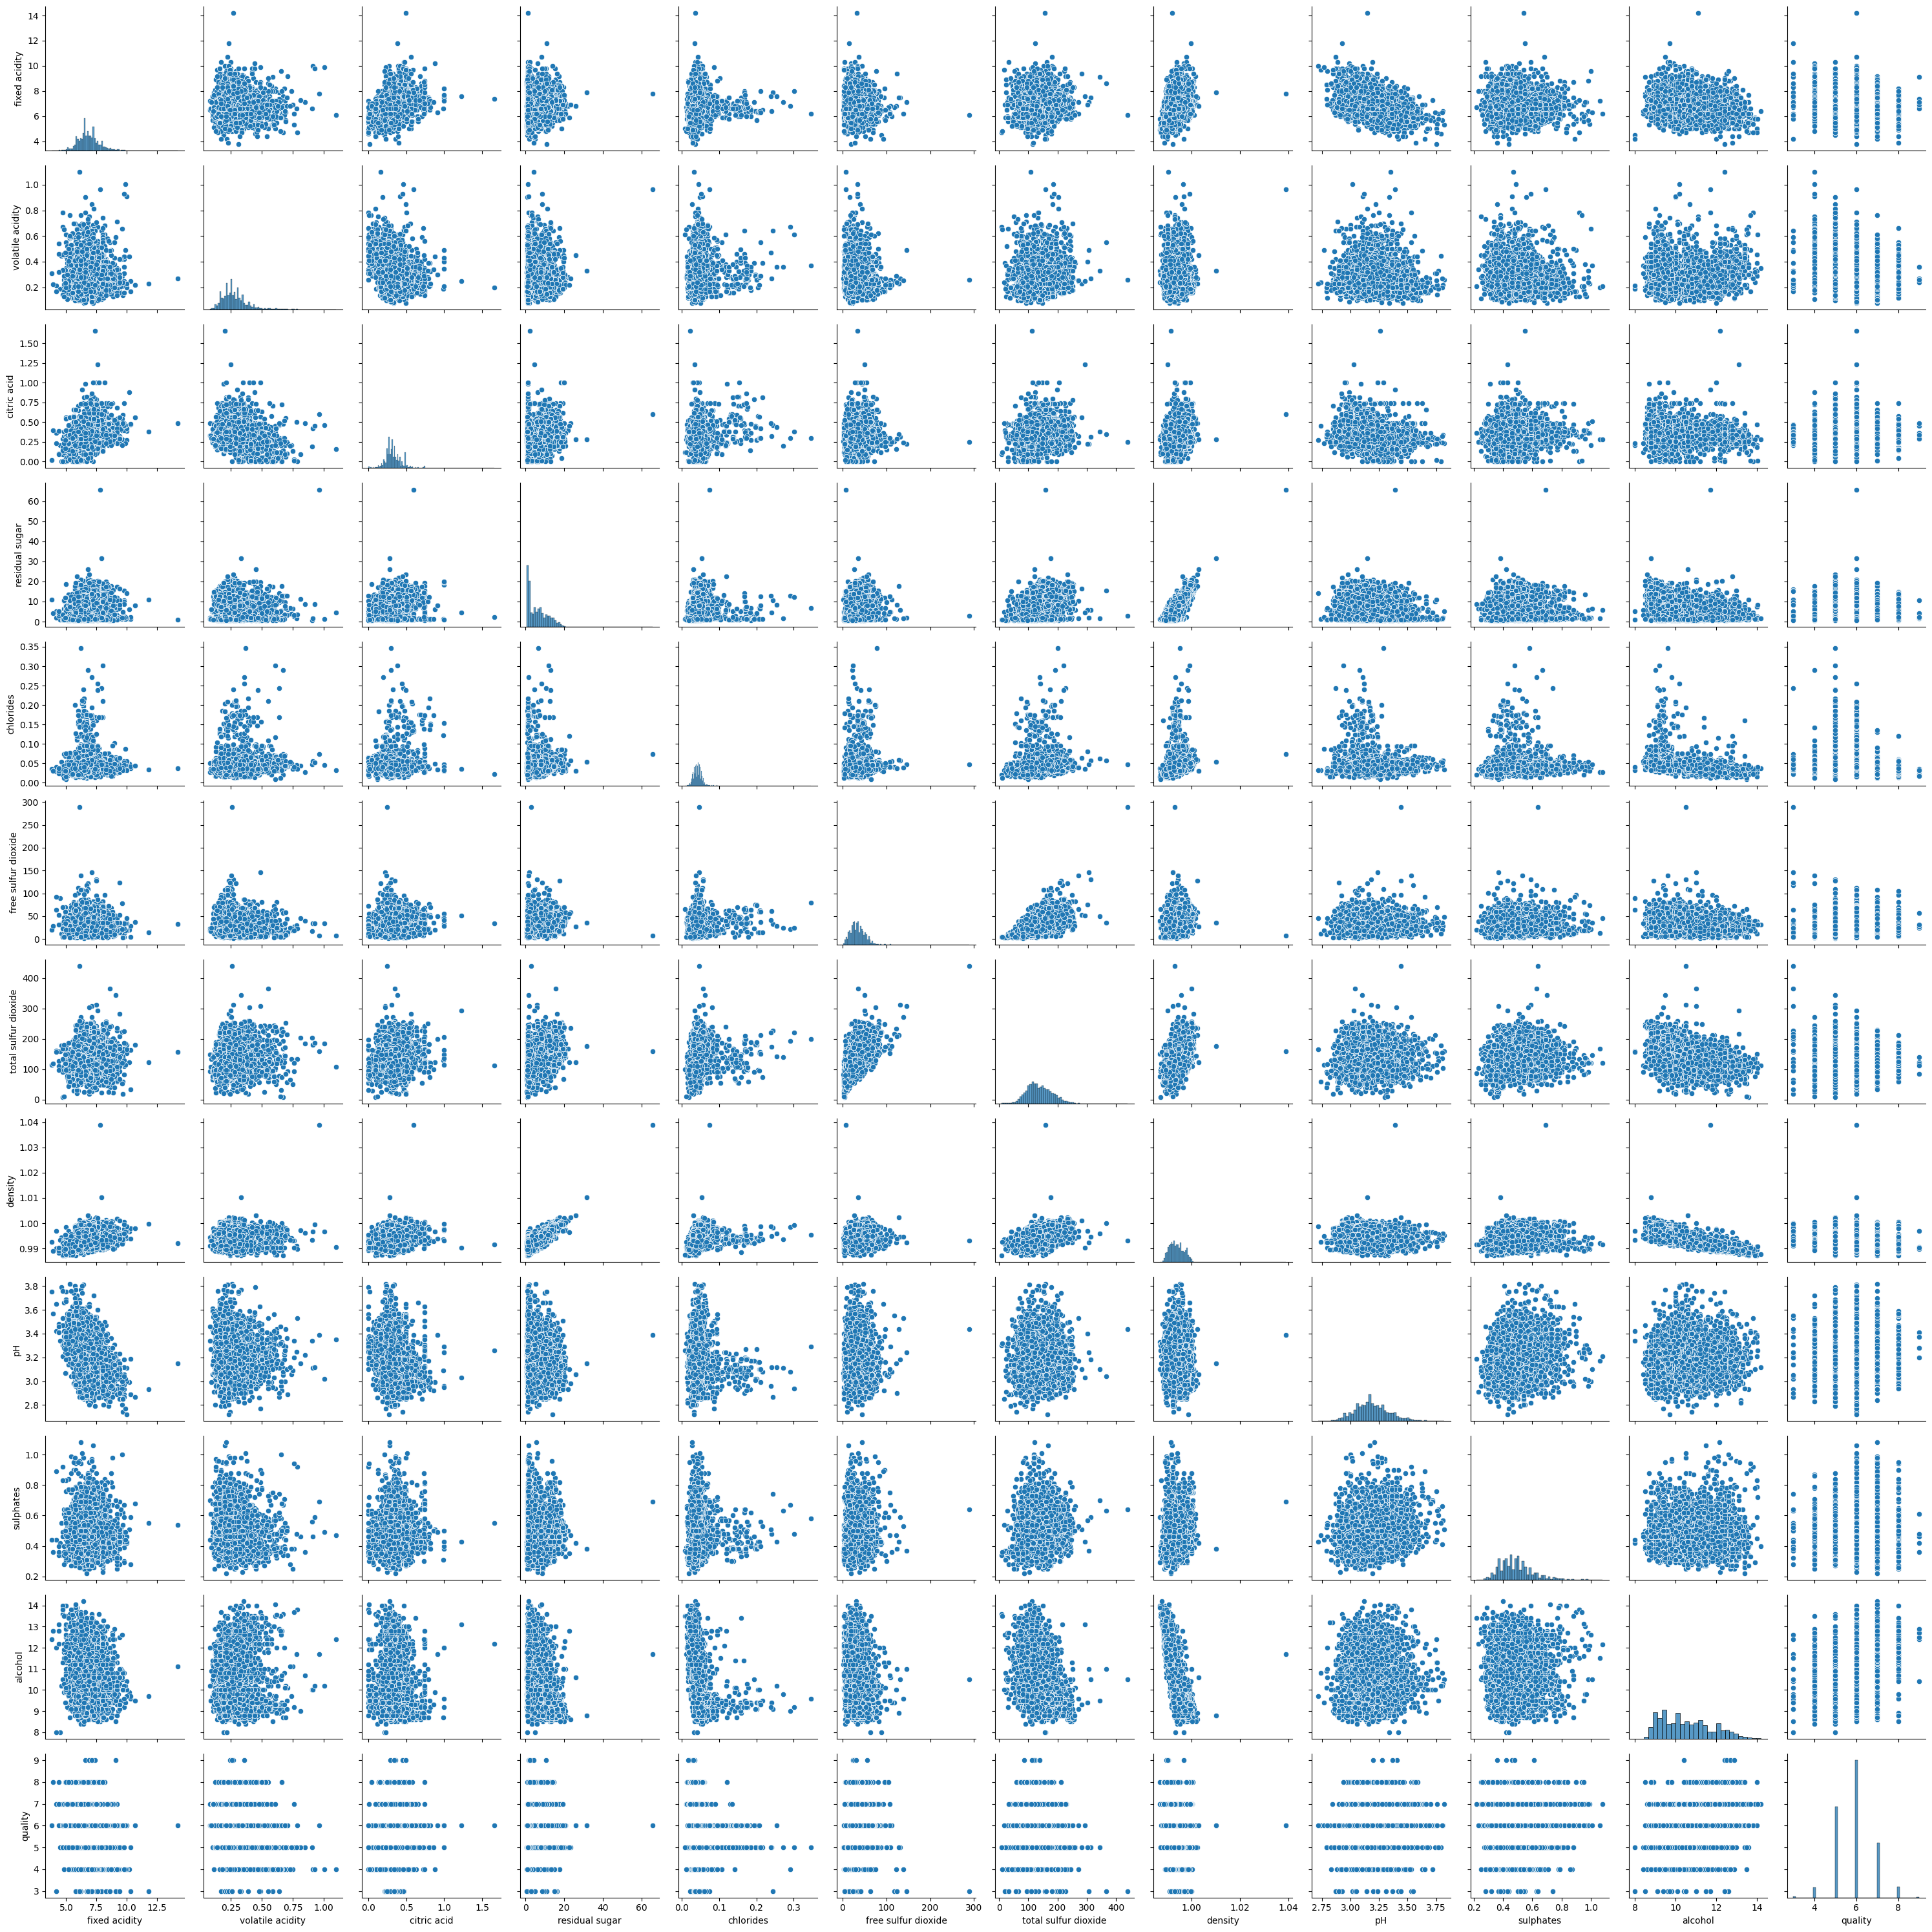

In [27]:
plt.figure(figsize=(18,40))
sns.pairplot(vino)
plt.tight_layout() 
plt.show()

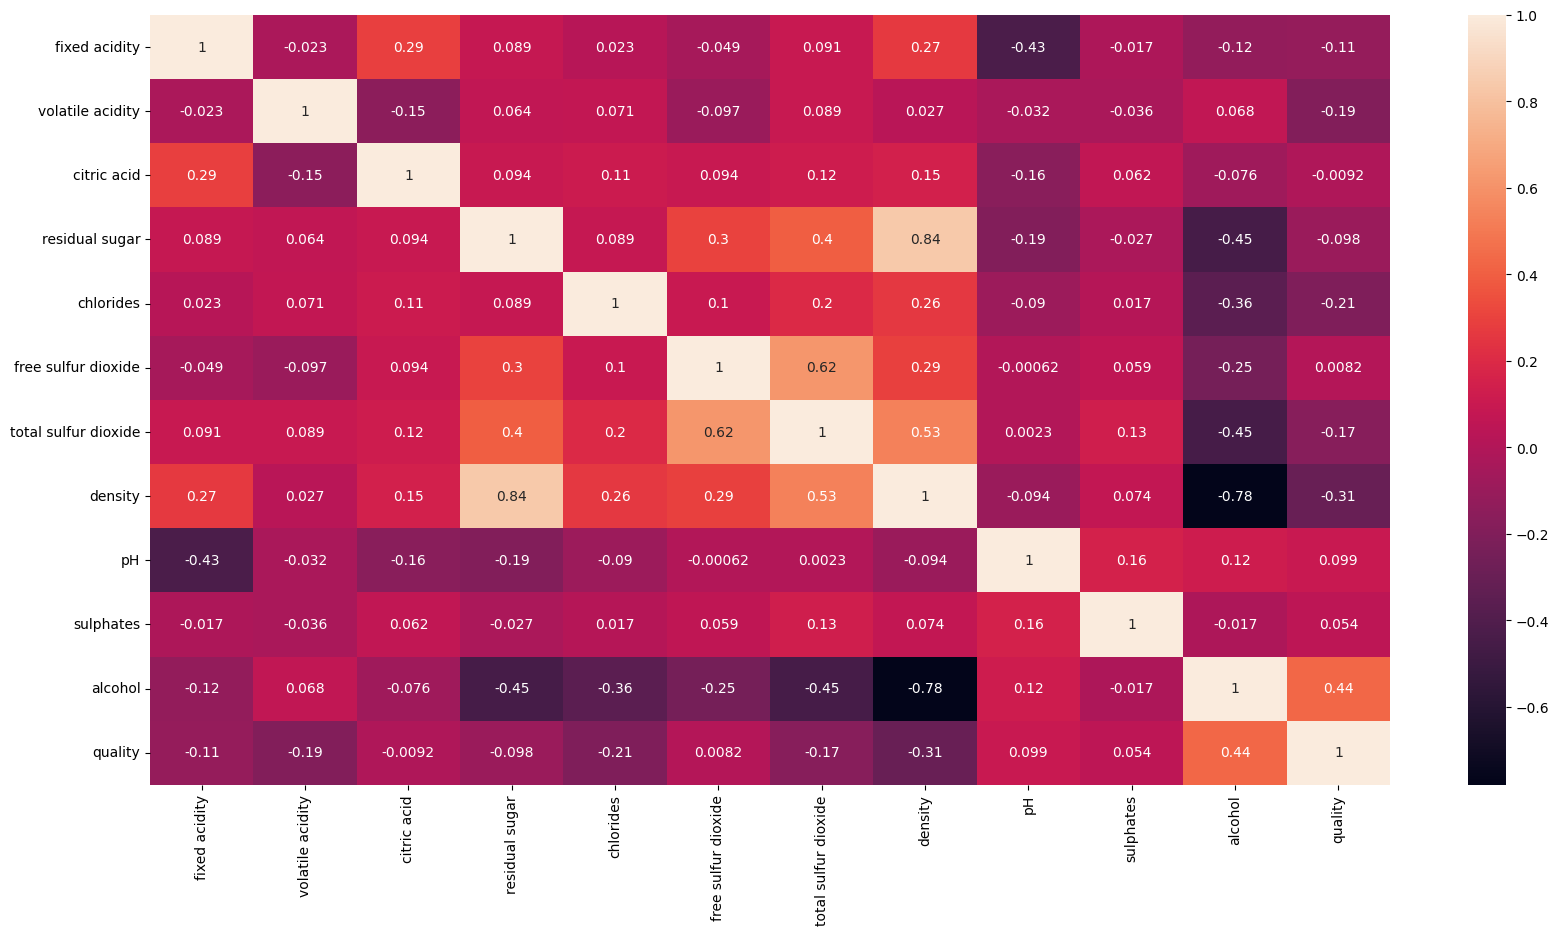

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(vino.corr(), annot=True);

In [53]:
vino.corrwith(vino['quality']).abs().sort_values(ascending=False)[1:]

alcohol                 0.435575
density                 0.307123
chlorides               0.209934
volatile acidity        0.194723
total sulfur dioxide    0.174737
fixed acidity           0.113663
pH                      0.099427
residual sugar          0.097577
sulphates               0.053678
citric acid             0.009209
free sulfur dioxide     0.008158
dtype: float64

Aunque las correlaciones no son muy marcadas, sí se aprecia que las características más correladas con nuestro *target* de calidad son:

+ alcohol
+ density
+ chlorides
+ volatile acidity

Veamos algunos análisis tomando únicamente estas variables más correladas frente a la calidad:

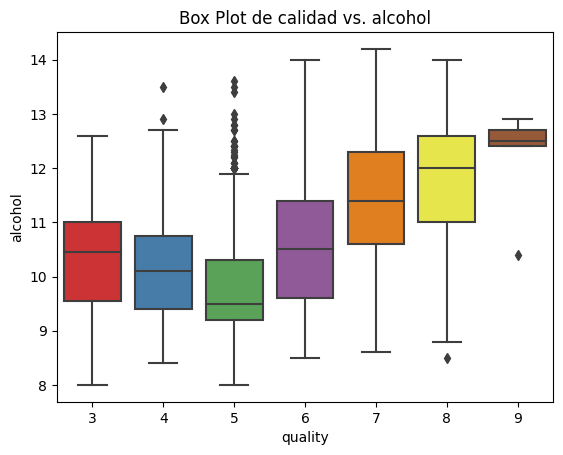

In [58]:
sns.boxplot(x=vino.quality, y=vino.alcohol, palette='Set1')
plt.title("Box Plot de calidad vs. alcohol")
plt.show()

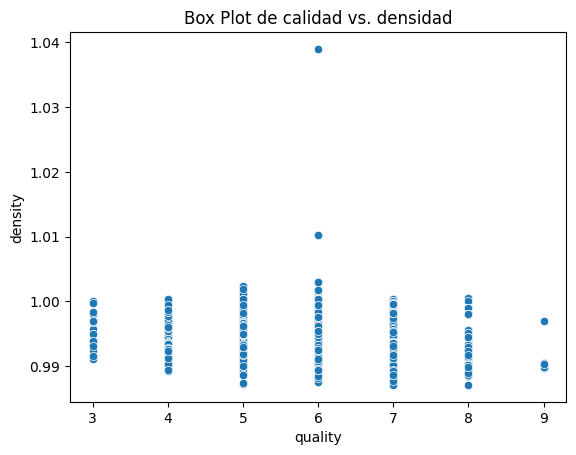

In [63]:
sns.scatterplot(x=vino.quality, y=vino.density)
plt.title("Box Plot de calidad vs. densidad")
plt.show()

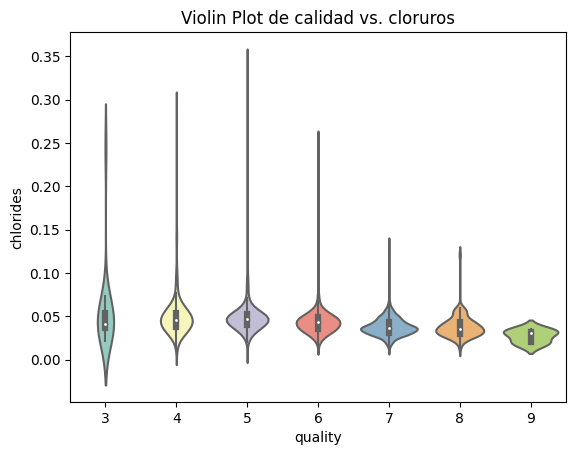

In [66]:
sns.violinplot(x=vino.quality, y=vino.chlorides, palette='Set3')
plt.title("Violin Plot de calidad vs. cloruros")
plt.show()

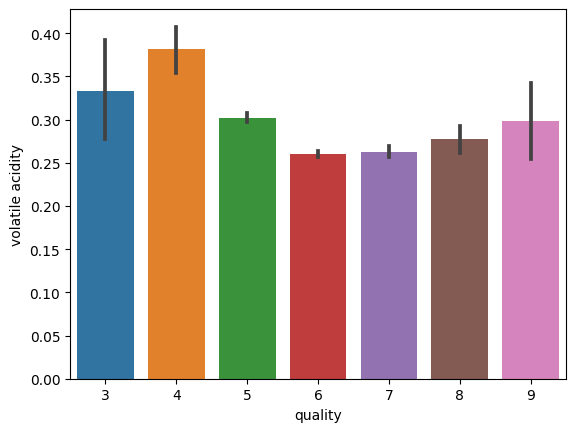

In [6]:
sns.barplot(x='quality',y='volatile acidity',data=vino);
plt.show()

A pesar de esto, hemos decidido entrenar los modelos con todas las variables porque, independientemente de cómo correlen y por las características de este producto en particular, todas influyen en último término en la calidad del vino.